# Feature extraction with gabor and laplacian form cv2 libraries

## Gabor filter

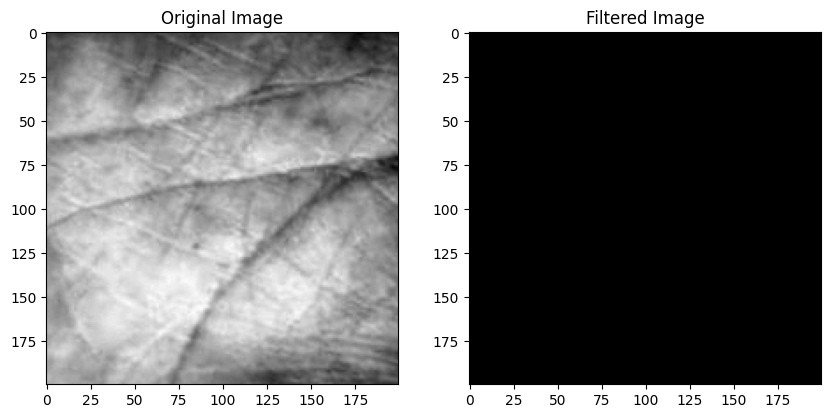

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image in grayscale
image = cv2.imread('roi_test.jpg', cv2.IMREAD_GRAYSCALE)

# Define Gabor filter parameters
ksize = 10 # Kernel size
sigma = 4.0  # Standard deviation
theta = np.pi / 4  # Orientation
lambd = 10.0  # Wavelength
gamma = 0.5  # Aspect ratio
psi = 0  # Phase offset

# Create Gabor kernel
gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_64F)

# Apply Gabor filter
filtered_image = cv2.filter2D(image, cv2.CV_8UC3, gabor_kernel)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.show()


## Laplacian filter

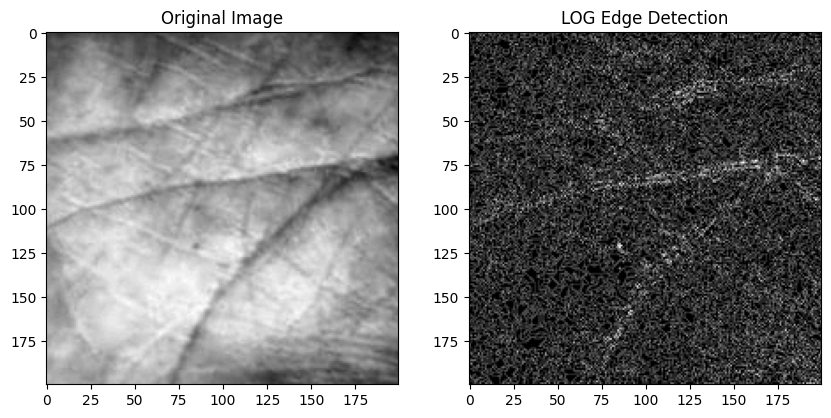

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def laplacian_of_gaussian(image, kernel_size=5, sigma=1.0):
    """
    Apply Laplacian of Gaussian (LOG) to an image.
    
    Parameters:
    - image: Input grayscale image (numpy array).
    - kernel_size: Size of the Gaussian kernel (must be odd).
    - sigma: Standard deviation of the Gaussian kernel.
    
    Returns:
    - log_image: Image after applying LOG.
    """
    # Step 1: Apply Gaussian Blur to smooth the image and reduce noise
    blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    
    # Step 2: Apply Laplacian to detect edges
    log_image = cv2.Laplacian(blurred, cv2.CV_64F)
    
    # Convert to uint8 for display
    log_image = cv2.convertScaleAbs(log_image)
    
    return log_image

# Load an example image (convert to grayscale)
image = cv2.imread('roi_test.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Laplacian of Gaussian (LOG)
log_result = laplacian_of_gaussian(image, kernel_size=5, sigma=1.0)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(log_result, cmap='gray'), plt.title('LOG Edge Detection')
plt.show()
